In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [2]:
# Imports dataframe after already removing outliers (done in "FilFinding_Data2.ipynb")
df = pd.read_csv('/Users/Daniel/Desktop/Research_Projects/NYCCT_Cosmic_Filaments/FilsGalsProperties_stats.csv')
df  

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
0,14472,0.11432,4,0.115302,10.5763,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1,14480,0.20018,4,0.201238,10.3639,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
2,14485,0.18342,5,0.184461,10.8563,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
3,14486,0.19952,4,0.200574,10.7926,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
4,14487,0.20088,4,0.201935,10.0827,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,746914,0.21139,4,0.212345,11.0295,0.091299,9.84517,0.144343,0.008360,0.005882,...,-0.192532,1.660380,307706.0,1.501970e+09,150197.0,NaN,NaN,NaN,NaN,NaN
9908,747326,0.18675,4,0.187759,11.4767,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
9909,748601,0.19344,4,0.194463,10.2161,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
9910,748610,0.12744,4,0.128396,10.5102,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x10b14b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x10b14bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x10b14b4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x10b169340>],
 'fliers': [<matplotlib.lines.Line2D at 0x10b169610>],
 'means': []}

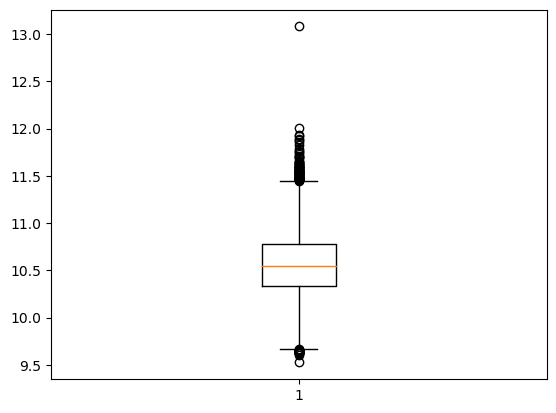

In [3]:
# Box plot 
plt.boxplot(df['logmstar'])

In [4]:
#### REMOVE THAT ONE ANNOYING POINT
df = df[(df['logmstar'] < 12)]
df

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
0,14472,0.11432,4,0.115302,10.5763,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1,14480,0.20018,4,0.201238,10.3639,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
2,14485,0.18342,5,0.184461,10.8563,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
3,14486,0.19952,4,0.200574,10.7926,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
4,14487,0.20088,4,0.201935,10.0827,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,746914,0.21139,4,0.212345,11.0295,0.091299,9.84517,0.144343,0.008360,0.005882,...,-0.192532,1.660380,307706.0,1.501970e+09,150197.0,NaN,NaN,NaN,NaN,NaN
9908,747326,0.18675,4,0.187759,11.4767,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
9909,748601,0.19344,4,0.194463,10.2161,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
9910,748610,0.12744,4,0.128396,10.5102,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN


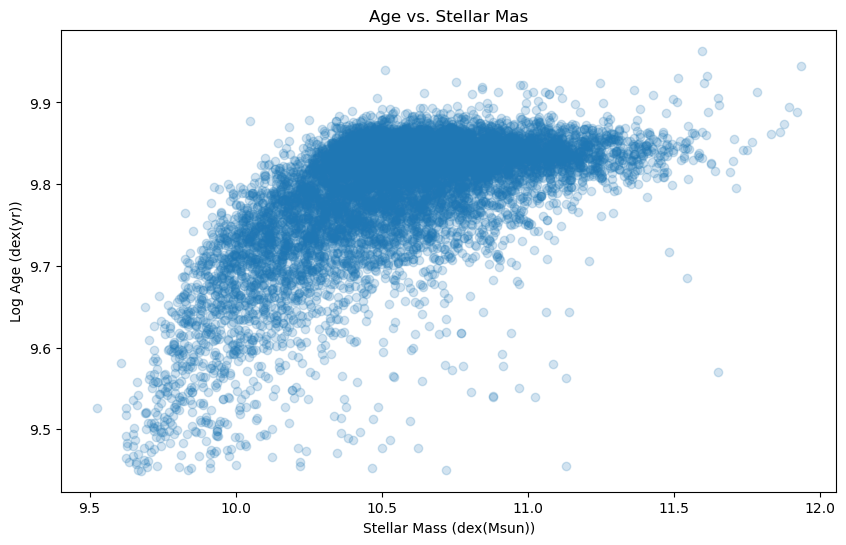

In [5]:
#Scatter Plot with whatever property you want to compare against distance to filament (x-axis)
x = df['d']

y = df['logage']
x2 = df['logmstar']


%matplotlib inline

plt.figure(figsize = (10,6))
plt.scatter(x2,y, alpha = 0.2)
#plt.title('Age vs. Distance to Closest Filament')
plt.title('Age vs. Stellar Mas')
#plt.xlabel('Distance to closest filament (Mpc/h)')
plt.xlabel('Stellar Mass (dex(Msun))')
plt.ylabel('Log Age (dex(yr))')

plt.show()

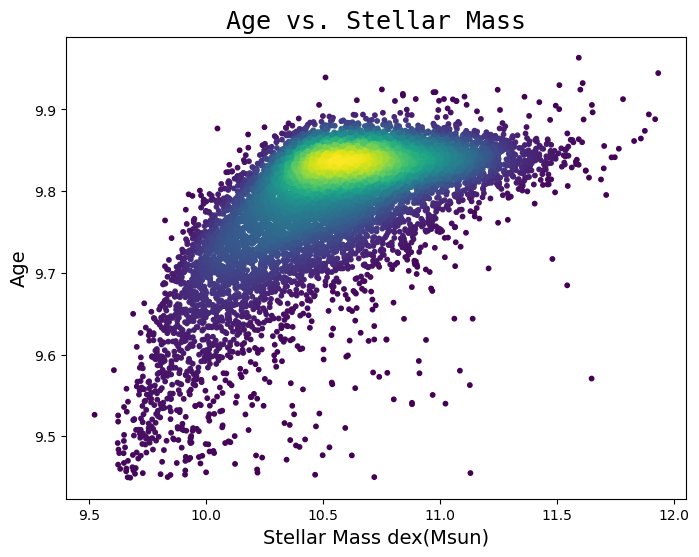

In [6]:
x = df['d']

y = df['logage']
x2 = df['logmstar']

# Calculate the point density
#xy = np.vstack([x,y])
xy = np.vstack([x2,y])
z = gaussian_kde(xy)(xy)


#fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
plt.scatter(x2, y, c=z, s=10)
#plt.colorbar()
## plt.title('Age vs. Distance to Closest Filament', font = 'monospace', fontsize = 18)
plt.title('Age vs. Stellar Mass', font = 'monospace', fontsize = 18)
## plt.xlabel('Distance to closest filament (Mpc/h)', fontsize = 14)
plt.xlabel('Stellar Mass dex(Msun)', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

plt.show()

### MEDIAN + ADDING ERROR BARS

#### Scipy stats.binned_statistic() function - computes the binned statistics value for the given data (array elements). 

Works similar to histogram function but computes the sum, mean, median, count or other statisticsof values for each bin

In [7]:
# 
y = df['logage']
x2 = df['logmstar']

stats.binned_statistic(x=y, values=x2, statistic='median', bins = 10)

BinnedStatisticResult(statistic=array([ 9.87579 ,  9.8516  ,  9.932745, 10.03045 , 10.14505 , 10.3132  ,
       10.4971  , 10.6815  , 10.7099  , 11.08135 ]), bin_edges=array([9.44925, 9.50065, 9.55205, 9.60345, 9.65485, 9.70625, 9.75765,
       9.80905, 9.86045, 9.91185, 9.96325]), binnumber=array([8, 7, 7, ..., 7, 8, 8]))

Text(0, 0.5, 'STELLAR MASS')

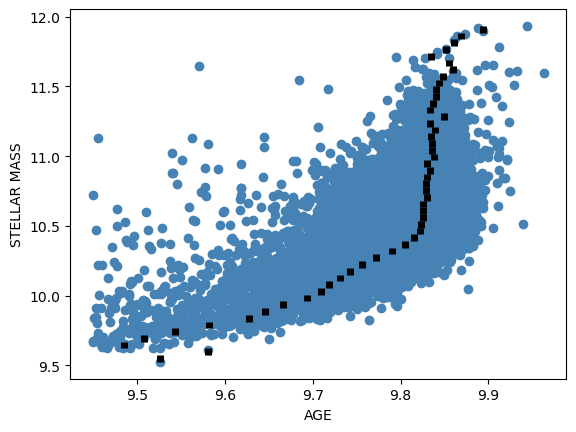

In [8]:
# try plotting this  
bin_means, bin_edges, binnumber = stats.binned_statistic(x=x2, values=y,statistic='median', bins = 50)

plt.scatter(y, x2,c = 'steelblue')   # Plots inverse graph, AGE on x-axis and MASS on y axis
plt.vlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'k',lw = 5)
plt.xlabel('AGE')
plt.ylabel('STELLAR MASS')

Text(0.5, 0, 'STELLAR MASS')

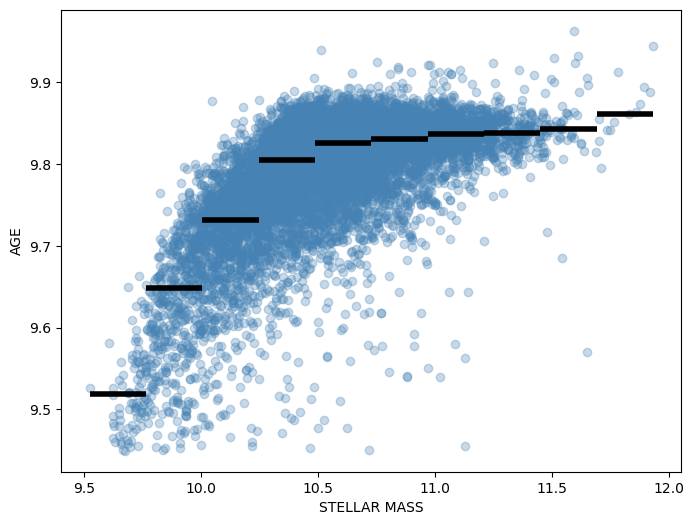

In [9]:
# try plotting this  
xy = np.vstack([x2,y])
z = gaussian_kde(xy)(xy)


bin_means, bin_edges, binnumber = stats.binned_statistic(x=x2, values=y,statistic='median', bins = 10)



plt.figure(figsize = (8,6))
#plt.scatter(x2, y, c = z)   

plt.scatter(x2, y, c = 'steelblue', alpha = 0.3)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'k',lw = 4)
plt.ylabel('AGE')
plt.xlabel('STELLAR MASS')

binx = [9.5, 10, 10.5, 11, 11.5, 12]
biny = [9, 9.5, 9.6, 9.7, 9.8, 9.9]

stats.binned_statistic_2d(x2,y, x2, 'median', bins = [binx, biny])

binx = [9.5, 10, 10.5, 11, 11.5, 12]
biny = [9, 9.5, 9.6, 9.7, 9.8, 9.9]

bin_means, bin_edges, binnumber = stats.binned_statistic_2d(x2,y, x2, 'median', bins = [binx, biny])

plt.figure(figsize = (8,6))
  

plt.scatter(x2, y, c = 'steelblue', alpha = 0.3)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'k',lw = 5)
plt.ylabel('AGE')
plt.xlabel('STELLAR MASS')

(array([0.00209343, 0.00209343, 0.04186853, 0.0397751 , 0.09839104,
        0.12979243, 0.18003466, 0.20515578, 0.30354682, 0.3496022 ,
        0.40403128, 0.47520778, 0.47520778, 0.58406595, 0.61337392,
        0.71385838, 0.82899683, 1.00903149, 1.16185162, 1.23093468,
        1.2560558 , 1.18697273, 1.14719763, 1.11370281, 1.0257789 ,
        0.99437751, 0.81015599, 0.71595181, 0.57987909, 0.54429085,
        0.47520778, 0.42077869, 0.37262989, 0.30145339, 0.22399662,
        0.19259522, 0.12351215, 0.09001733, 0.09839104, 0.06070936,
        0.05652251, 0.0314014 , 0.02512112, 0.01465398, 0.00837371,
        0.00837371, 0.00628028, 0.00209343, 0.00418685, 0.00628028]),
 array([ 9.52438  ,  9.5725824,  9.6207848,  9.6689872,  9.7171896,
         9.765392 ,  9.8135944,  9.8617968,  9.9099992,  9.9582016,
        10.006404 , 10.0546064, 10.1028088, 10.1510112, 10.1992136,
        10.247416 , 10.2956184, 10.3438208, 10.3920232, 10.4402256,
        10.488428 , 10.5366304, 10.5848328, 10

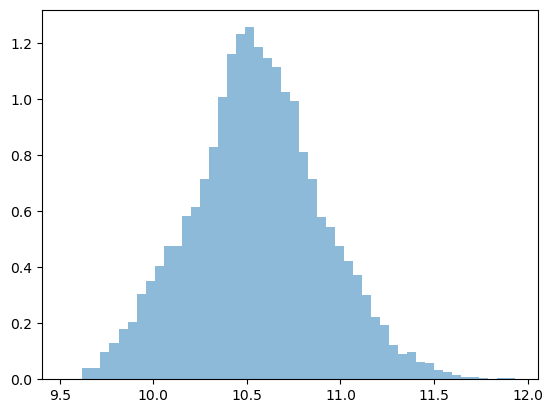

In [10]:
bin_means, bin_edges, binnumber = stats.binned_statistic(x=x2, values=y,statistic='median', bins = 10)

plt.hist(x2, bins = 50, density = True, histtype='stepfilled', alpha = 0.5)

(array([1.66871493e-01, 9.81597019e-02, 1.86503434e-01, 1.27607612e-01,
        2.74847165e-01, 2.35583285e-01, 1.76687463e-01, 2.06135374e-01,
        2.45399255e-01, 2.45399255e-01, 2.55215225e-01, 3.04295076e-01,
        3.04295076e-01, 3.04295076e-01, 4.61350599e-01, 4.41718659e-01,
        4.90798510e-01, 5.88958211e-01, 5.98774182e-01, 7.06749854e-01,
        8.73621347e-01, 8.73621347e-01, 1.05030881e+00, 1.37423583e+00,
        1.54110732e+00, 1.99264195e+00, 1.76687463e+00, 2.73865568e+00,
        2.68957583e+00, 2.93497509e+00, 3.32761389e+00, 3.76933255e+00,
        3.85767629e+00, 4.48589838e+00, 5.18283226e+00, 7.48958526e+00,
        8.94234884e+00, 1.07386714e+01, 1.01693451e+01, 8.13743929e+00,
        4.50553032e+00, 1.52147538e+00, 4.22086718e-01, 1.96319404e-01,
        9.81597019e-02, 9.81597019e-02, 4.90798510e-02, 9.81597019e-03,
        9.81597019e-03, 9.81597019e-03]),
 array([9.44925, 9.45953, 9.46981, 9.48009, 9.49037, 9.50065, 9.51093,
        9.52121, 9.5314

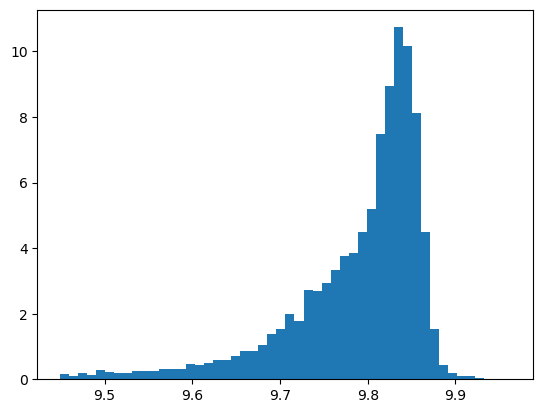

In [11]:
plt.hist(y, bins = 50, density = True, histtype = 'stepfilled')

In [12]:
bin_means, bin_edges, binnumber = stats.binned_statistic(x=x2, values=y,statistic='median', bins = 10)

print(bin_means,"\n")
print(bin_edges,"\n")
print(binnumber)

[9.518825 9.648655 9.73139  9.805345 9.82596  9.83035  9.83641  9.838105
 9.84263  9.86133 ] 

[ 9.52438   9.765392 10.006404 10.247416 10.488428 10.72944  10.970452
 11.211464 11.452476 11.693488 11.9345  ] 

[5 4 6 ... 3 5 4]


Text(0.5, 0, 'STELLAR MASS')

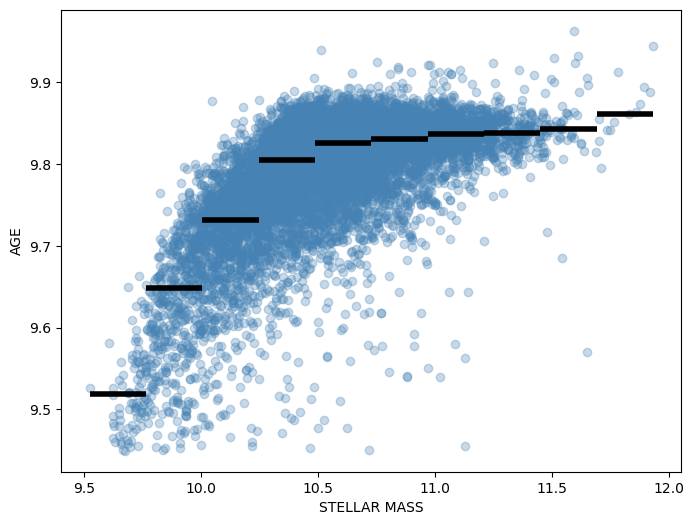

In [13]:
# try plotting this  
bin_means, bin_edges, binnumber = stats.binned_statistic(x=x2, values=y,statistic='median', bins = 10)

plt.figure(figsize = (8,6))  

plt.scatter(x2, y, c = 'steelblue', alpha = 0.3)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'k',lw = 4)
plt.ylabel('AGE')
plt.xlabel('STELLAR MASS')

Text(0, 0.5, 'Median age')

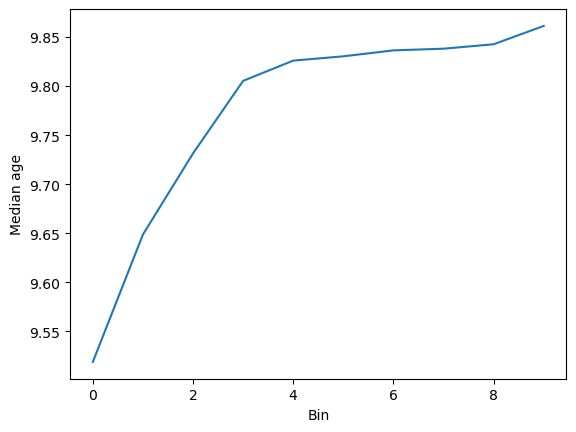

In [14]:
plt.plot(bin_means)
plt.xlabel('Bin')
plt.ylabel('Median age')

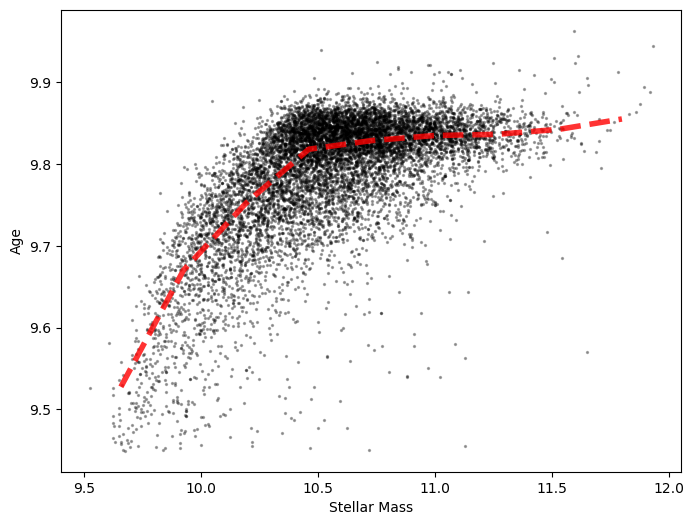

In [39]:
### USING np.digitize
total_bins = 10
# Using my data
X = x2
Y = y

bins = np.linspace(X.min(),X.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==i]) for i in range(total_bins)]

plt.figure(figsize = (8,6))
plt.scatter(X,Y,color='k',alpha=.3,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.axis('tight')
plt.xlabel('Stellar Mass')
plt.ylabel('Age')


plt.show()

In [23]:
idx

array([4, 4, 5, ..., 3, 4, 3])

In [24]:
running_median

[nan,
 9.52743,
 9.670195,
 9.752405,
 9.81821,
 9.828775,
 9.83498,
 9.83645,
 9.84263,
 9.85524]

<ErrorbarContainer object of 3 artists>

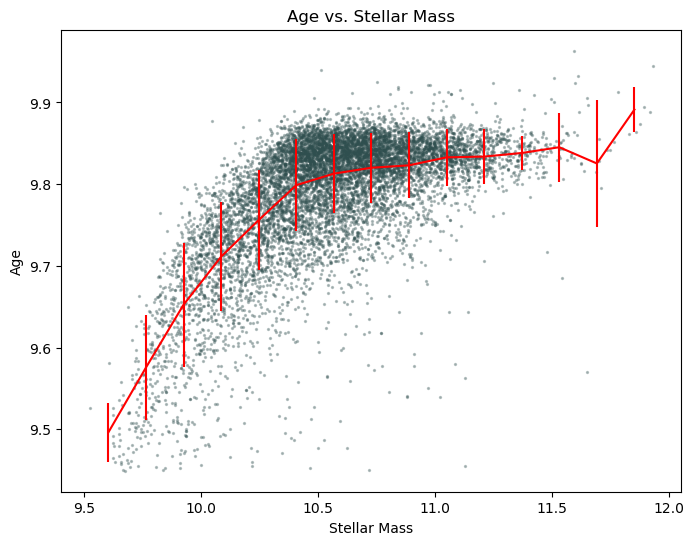

In [68]:
# Binning and adding errorbars using np.histogram
x = df['logmstar']
y = df['logage']
nbins = 15

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.figure(figsize = (8,6))
plt.scatter(x, y, c ='darkslategrey',alpha=.3,s=2)
plt.title('Age vs. Stellar Mass')
plt.xlabel('Stellar Mass')
plt.ylabel('Age')

plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

#plt.savefig('Age_v_Mass_errbars.png')


In [69]:
np.histogram(x, bins=nbins)

(array([  23,  187,  436,  746, 1055, 1780, 1884, 1611,  983,  659,  329,
         139,   57,   14,    7]),
 array([ 9.52438   ,  9.68505467,  9.84572933, 10.006404  , 10.16707867,
        10.32775333, 10.488428  , 10.64910267, 10.80977733, 10.970452  ,
        11.13112667, 11.29180133, 11.452476  , 11.61315067, 11.77382533,
        11.9345    ]))

In [71]:
np.histogram(x, bins=nbins, weights=y)

(array([  218.41237,  1790.61835,  4208.42524,  7244.54613, 10292.57696,
        17441.70057, 18487.35116, 15820.06499,  9655.99496,  6479.79954,
         3235.28626,  1367.49514,   561.17362,   137.55399,    69.2383 ]),
 array([ 9.52438   ,  9.68505467,  9.84572933, 10.006404  , 10.16707867,
        10.32775333, 10.488428  , 10.64910267, 10.80977733, 10.970452  ,
        11.13112667, 11.29180133, 11.452476  , 11.61315067, 11.77382533,
        11.9345    ]))

In [72]:
np.histogram(x, bins=nbins, weights=y*y)

(array([  2074.11527005,  17146.83541524,  40623.69468263,  70356.43876032,
        100418.3665586 , 170911.74954547, 181417.42368019, 155356.44238202,
         94852.30552512,  63715.21779339,  31815.19025151,  13453.60383731,
          5524.93953966,   1351.59062358,    684.85410708]),
 array([ 9.52438   ,  9.68505467,  9.84572933, 10.006404  , 10.16707867,
        10.32775333, 10.488428  , 10.64910267, 10.80977733, 10.970452  ,
        11.13112667, 11.29180133, 11.452476  , 11.61315067, 11.77382533,
        11.9345    ]))

In [73]:
print(mean,"\n")
print(std)

[9.49619    9.5754992  9.65235147 9.71118784 9.75599712 9.79870819
 9.81281909 9.82002793 9.82298572 9.83277624 9.83369684 9.83809453
 9.84515123 9.825285   9.89118571] 

[0.03605924 0.06420393 0.07564918 0.06641392 0.06169329 0.0561669
 0.04827903 0.04288174 0.04040673 0.03481705 0.03335284 0.02031717
 0.04196606 0.07721442 0.02731625]


In [74]:
_

array([ 9.52438   ,  9.68505467,  9.84572933, 10.006404  , 10.16707867,
       10.32775333, 10.488428  , 10.64910267, 10.80977733, 10.970452  ,
       11.13112667, 11.29180133, 11.452476  , 11.61315067, 11.77382533,
       11.9345    ])